In [1]:
# General libraries
import re, string
import pandas as pd
import yake

In [2]:
#Reading Dataset
df=pd.read_csv("Womens Clothing E-Commerce Reviews.csv")

In [3]:
#Data Preparation
df.describe()
df.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
df.head(10)

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits
7,858,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,1,4,General Petite,Tops,Knits
8,1077,24,Flattering,I love this dress. i usually get an xs but it ...,5,1,0,General,Dresses,Dresses
9,1077,34,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,1,0,General,Dresses,Dresses


In [5]:
df.dropna(subset=['Review Text'], inplace=True)

In [6]:
df.Title = df.Title.fillna('')

In [7]:
df['Full text']=df['Title']+' '+df['Review Text']

In [8]:
df.head(10)

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Full text
0,767,33,,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,Absolutely wonderful - silky and sexy and com...
1,1080,34,,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,Love this dress! it's sooo pretty. i happen...
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,Some major design flaws I had such high hopes ...
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,"My favorite buy! I love, love, love this jumps..."
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,Flattering shirt This shirt is very flattering...
5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,Not for the very petite I love tracy reese dre...
6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits,Cagrcoal shimmer fun I aded this in my basket ...
7,858,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,1,4,General Petite,Tops,Knits,"Shimmer, surprisingly goes with lots I ordered..."
8,1077,24,Flattering,I love this dress. i usually get an xs but it ...,5,1,0,General,Dresses,Dresses,Flattering I love this dress. i usually get an...
9,1077,34,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,1,0,General,Dresses,Dresses,"Such a fun dress! I'm 5""5' and 125 lbs. i orde..."


In [9]:
def extract_Keywords(text) -> dict:
    kw_extractor = yake.KeywordExtractor(top=5, stopwords=None)
    keyDict={}
    keywords = kw_extractor.extract_keywords(text)
    for keyphrase, score in keywords:
        keyDict.update({keyphrase:score})
    return keyDict

In [10]:
def remove_similar(textlist):
    """
    Remove one Occucerence of Similar Keywords from List
    """
    result=[]
    for i in range(len(textlist)):
        present=False
        for j in range(len(textlist)):
            if i!=j and textlist[i] in textlist[j] and present==False:
                present=True
        if present==False:
            result.append(textlist[i])
    return result

In [11]:
#Getting Keywords list using yake
df['keywords'] = df['Full text'].apply(lambda x: remove_similar(list(extract_Keywords(x).keys())))

In [12]:
#Fetching list of keywords for clothing ID 1078
from functools import reduce
single_list = list(map(lambda x: x.lower(),reduce(lambda x,y: x+y, df[df['Clothing ID']==1078]['keywords'].tolist())))
print(single_list)

['great summer fabric', 'love cute summer', 'cute summer dresses', 'sweet flattering dress', 'perfect summer dress', 'great sweater dress', 'recent baby weight', 'cute', 'opened this dress', 'adorable', 'super cute', 'love this sweater', 'compliments every time', 'sweater dress', 'fun dress extremely', 'dress extremely flattering', 'grey version', 'yellow combination', 'fun mix', 'version i ordered', 'ordered this dress', 'shorter girls', 'wanted to love', 'dress', 'cute', 'comfortable', 'hand', 'aesthetics and comfort', 'fits the bill', 'fun colors drew', 'cute concept', 'fits weird', 'fit weird', 'love this dress', 'comfortable and versatile', 'dress very comfortable', 'weird fit', 'cute in person', 'fit this dress', 'comfy', 'cute', 'colorful', 'dress', 'skirt', 'dress love love', 'fitting dress love', 'short beautiful colors', 'cute but skip', 'cute and fun', 'nice dress', 'horizontal lines', 'tunic the colors', 'great dress', 'dress or tunic', 'playful and bouncy', 'light hearted 

In [13]:
#Fetching unique keyword from list of keywords for clothing ID 1078 and creating dictionary of keywords with their frequency
import numpy as np

res = list(zip(*np.unique(single_list, return_counts=True)))
resDict={}
for j in res:
    resDict.update({j[0]:j[1]})
print(resDict)

{'14-16 dress size': 1, 'absolute perfection': 1, 'absolutely adore': 1, 'absolutely beautiful': 3, 'absolutely elegant': 1, 'absolutely flattering': 1, 'absolutely georgeous': 1, 'absolutely gorgeous': 3, 'absolutely gorgeous dress': 1, 'absolutely hideous': 1, 'absolutely in love': 2, 'absolutely love': 8, 'absolutely loved': 1, 'absolutely stunning': 2, 'abundant high-quality details': 1, 'accident': 1, 'actual swing skirt': 1, 'add extra uncomfortable': 1, 'addition to dress': 1, 'adorable': 14, 'adorable and comfortable': 1, 'adorable and flattering': 1, 'adorable and funky': 1, 'adorable dress': 2, 'adorable girly dress': 1, 'adorable i love': 1, 'adorable so cute': 1, 'adorable spring time': 1, 'adore this dress': 3, 'aesthetics and comfort': 1, 'afraid to order': 1, 'aghast': 1, 'agree': 1, 'ahead and purchase': 1, 'airy': 1, 'alas it fit': 1, 'aline': 1, 'alterations needed': 1, 'amazing': 1, 'amazing comfy': 1, 'amazing detail': 1, 'amazing dress': 3, 'amazing summer dress': 

In [14]:
#sorting Dictionary to get most frequent keywords on top
from operator import itemgetter
sorted(resDict.items(), key=itemgetter(1), reverse=True)

[('dress', 94),
 ('love this dress', 77),
 ('love', 41),
 ('beautiful dress', 36),
 ('cute', 32),
 ('size', 30),
 ('great dress', 27),
 ('flattering', 19),
 ('cute dress', 16),
 ('wanted to love', 16),
 ('great', 15),
 ('adorable', 14),
 ('comfortable', 14),
 ('beautiful', 12),
 ('pretty dress', 12),
 ('perfect', 11),
 ('store', 11),
 ('fit', 10),
 ('gorgeous', 10),
 ('absolutely love', 8),
 ('bought this dress', 8),
 ('dress online', 8),
 ('lovely', 8),
 ('person', 8),
 ('true to size', 8),
 ('fun dress', 7),
 ('gorgeous dress', 7),
 ('love the colors', 7),
 ('loved this dress', 7),
 ('perfect dress', 7),
 ('pretty', 7),
 ('disappointed', 6),
 ('dress is beautiful', 6),
 ('dress is gorgeous', 6),
 ('fabric', 6),
 ('lovely dress', 6),
 ('ordered this dress', 6),
 ('runs small', 6),
 ('super flattering', 6),
 ('wear', 6),
 ('caught my eye', 5),
 ('dress this dress', 5),
 ('dresses', 5),
 ('favorite dress', 5),
 ('flattering dress', 5),
 ('great fit', 5),
 ('petite', 5),
 ('super comfort

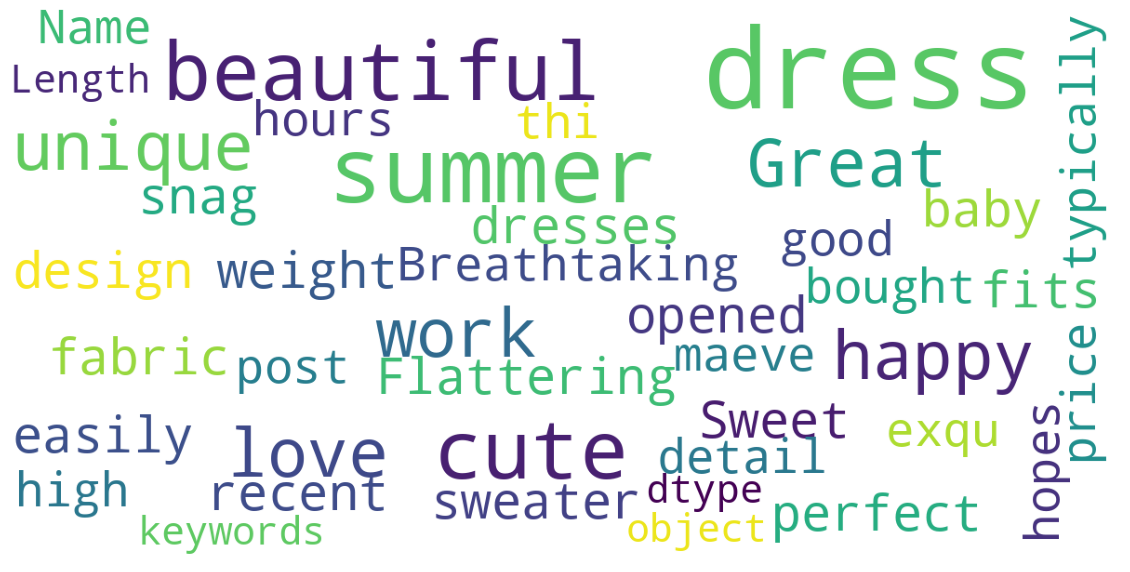

In [18]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(df[df['Clothing ID']==1078]['keywords'] )


In [ ]:
#writing Dataframe to Excel
df.to_excel("Yake_Keywords_Output.xlsx")

In [19]:
text="There are a bunch of reviews on the product already. Just sharing my 1st day experience so far, I loved it. This is a major upgrade for me, I jumped from iPhone 7 to 13mini after 4 years. Always wanted to smaller iPhone and looks like so far 13mini is by far the best predecessor of iPhone 7( for me interns of size vs performance ratio). Fantastic Camera, better battery life, and incredibly light phone. All the faults from iPhone 12mini are addressed in this phone. This will be a model which I can hold for at-least next three years in my opinion."
print(remove_similar(list(extract_Keywords(text).keys())))

['bunch of reviews', 'iPhone', 'product']
